In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Import Dataset


In [2]:
data_df=pd.read_csv('Data.csv')
data_df.head(10)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


# Data Imputation (Missing Data Replacement) 

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [21]:
for col in data_df.columns:
    missing_data=data_df[col].isna().sum()
    missing_percent=(missing_data/len(data_df))*100
    print(f'Column:{col} has {missing_percent}% missing data')


Column:Country has 0.0% missing data
Column:Age has 10.0% missing data
Column:Salary has 10.0% missing data
Column:Purchased has 0.0% missing data


In [22]:
data_df.isna()

,Country,Age,Salary,Purchased
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,True,False
5,False,False,False,False
6,False,True,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


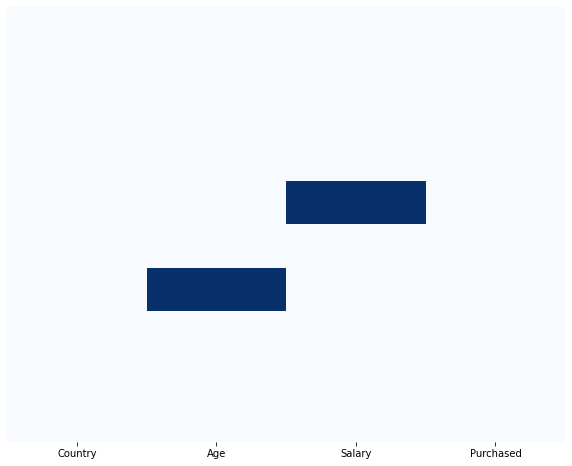

In [5]:
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(data_df.isna(),cmap="Blues",cbar=False,yticklabels=False);

In [6]:
data_df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [7]:
X=data_df.iloc[:,:3].values


In [8]:
y=data_df.iloc[:,-1].values


In [9]:
from sklearn.impute import SimpleImputer
#dung de xu ly du lieu bi thieu

In [10]:
#Create an instance of Class SimpleImputer : np.nan is the empty in the dataset
imputer=SimpleImputer(missing_values=np.nan,strategy="mean")
imputer.fit(X[:,1:3])
X[:,1:3]=imputer.transform(X[:,1:3])

In [11]:
X[:,1:3]

array([[44.0, 72000.0],
       [27.0, 48000.0],
       [30.0, 54000.0],
       [38.0, 61000.0],
       [40.0, 63777.77777777778],
       [35.0, 58000.0],
       [38.77777777777778, 52000.0],
       [48.0, 79000.0],
       [50.0, 83000.0],
       [37.0, 67000.0]], dtype=object)

# Encode Categorical Data
Encode Independent variable(X)

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder="passthrough")
X=ct.fit_transform(X)

In [13]:
X #(France,Germany,Spain,Age,Salary)

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [29]:
from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# y=le.fit_transform(y)

y=LabelEncoder().fit_transform(y)

In [15]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

# Split the dataset(X = data, y=output) 

In [16]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [17]:
X_train

array([[1.0, 0.0, 0.0, 35.0, 58000.0],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0]], dtype=object)

# Feature Scaling 

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[:,3:]=sc.fit_transform(X_train[:,3:])

In [19]:
X_train

array([[1.0, 0.0, 0.0, -0.7529426005471072, -0.6260377781240918],
       [1.0, 0.0, 0.0, 1.008453807952985, 1.0130429500553495],
       [1.0, 0.0, 0.0, 1.7912966561752484, 1.8325833141450703],
       [0.0, 1.0, 0.0, -1.7314961608249362, -1.0943465576039322],
       [1.0, 0.0, 0.0, -0.3615211764359756, 0.42765697570554906],
       [0.0, 1.0, 0.0, 0.22561095973072184, 0.05040823668012247],
       [0.0, 0.0, 1.0, -0.16581046438040975, -0.27480619351421154],
       [0.0, 0.0, 1.0, -0.013591021670525094, -1.3285009473438525]],
      dtype=object)

In [20]:
X_test[:,3:]=sc.fit_transform(X_test[:,3:])